In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.pipeline import Pipeline
import re 
import nltk
import string
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [2]:
lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [26]:
df = pd.read_csv("IMDB Dataset.csv")

In [27]:
df=df.sample(12000,random_state=42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 33553 to 5857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  object
dtypes: object(2)
memory usage: 234.4+ KB


In [28]:
df=df.dropna()

In [29]:
def transform_data(review):
        review = review.lower()
        review = re.sub('^a-zA-Z0-9',' ',review)
        review = re.sub('<.*?>',' ',review)
        review = "".join([x for x in review if x not in string.punctuation])
        review = review.split()
        review =[lm.lemmatize(x) for x in review if x not in stop_words]
        review = " ".join(review)
        return review
    
tranformed_rev = df.review.apply(transform_data)

In [8]:
df.head()

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative


In [9]:
tranformed_rev

33553    really liked summerslam due look arena curtain...
9427     many television show appeal quite many differe...
199      film quickly get major chase scene ever increa...
12447    jane austen would definitely approve one gwyne...
39489    expectation somewhat high went see movie thoug...
                               ...                        
28567    although casper van dien michael rooker genera...
25079    liked movie wasnt really sure started watching...
18707    yes nonsingaporeans cant see whats big deal fi...
15200    far film go likable enough entertaining charac...
5857     saw anatomy year ago dubbed friend house dont ...
Name: review, Length: 10000, dtype: object

# Data Visualization 

In [10]:
transformed_data = pd.DataFrame({"t_rev":tranformed_rev,"sentiment":df['sentiment']})

In [11]:
transformed_data

,t_rev,sentiment
33553,really liked summerslam due look arena curtain...,positive
9427,many television show appeal quite many differe...,positive
199,film quickly get major chase scene ever increa...,negative
12447,jane austen would definitely approve one gwyne...,positive
39489,expectation somewhat high went see movie thoug...,negative
...,...,...
23335,seen ton trash every language every topic ever...,negative
49537,core issue play god satan good evil tremendous...,negative
37824,thing perfect murderlieutenant columbo know th...,positive
6275,cheesiest movie ive ever seen scary bad 1st mo...,negative


## positive sentiment

In [12]:
tokens = str(list(transformed_data[transformed_data.sentiment=='positive'].t_rev)).split()

In [24]:
pos_words = (" ").join(tokens)

In [38]:
wc = WordCloud(height=800,width=1200).generate(pos_words)

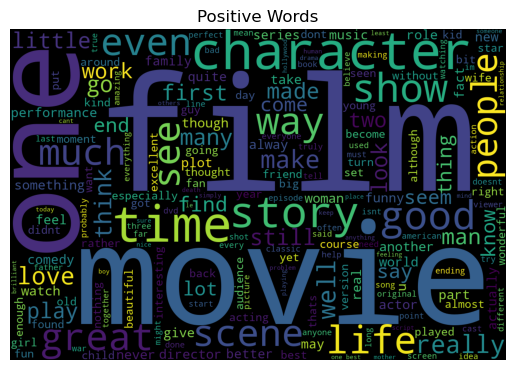

In [41]:
plt.imshow(wc)
plt.title("Positive Words")
plt.axis("off")
plt.show()

In [61]:
positive_words_frequency = Counter(tokens)

In [76]:
ps_f=positive_words_frequency.most_common(30)

In [77]:
data = pd.DataFrame(ps_f,columns=['word','freq']).sort_values('freq',ascending=False)

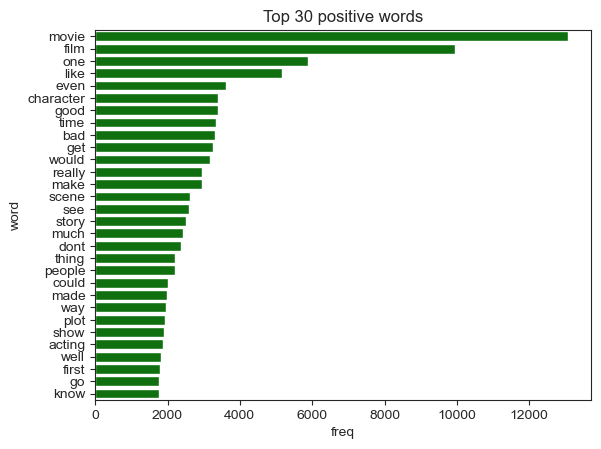

In [78]:
sns.set_style("ticks")
sns.barplot(x="freq",y='word',data=data,color='g').set(title='Top 30 positive words')

plt.show()

## Negative sentiment

In [79]:
tokens = str(list(transformed_data[transformed_data.sentiment=='negative'].t_rev)).split()

In [80]:
neg_words = (" ").join(tokens)

In [81]:
wc = WordCloud(height=800,width=1200).generate(neg_words)

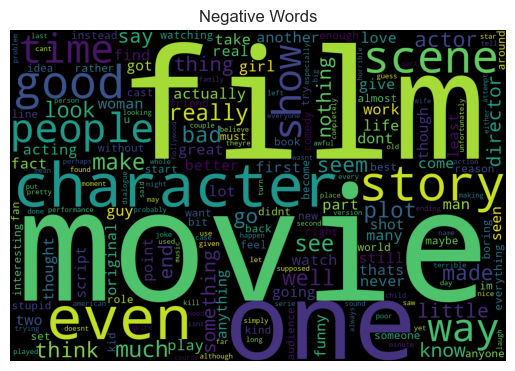

In [82]:
plt.imshow(wc)
plt.title("Negative Words")
plt.axis("off")
plt.show()

In [83]:
negative_words_frequency = Counter(tokens)

In [84]:
neg_f = negative_words_frequency.most_common(30)

In [85]:
data = pd.DataFrame(neg_f,columns=['word','freq']).sort_values('freq',ascending=False)

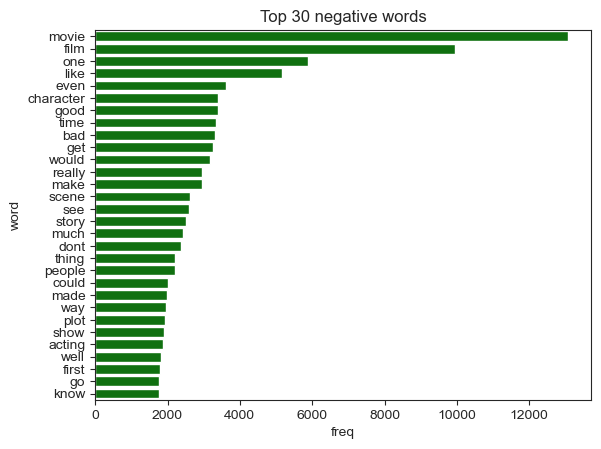

In [86]:
sns.barplot(x="freq",y='word',data=data,color='g').set(title='Top 30 negative words')

plt.show()

In [31]:
tf =TfidfVectorizer()
cv=CountVectorizer()

In [32]:
lb=LabelEncoder()
X = tf.fit_transform(tranformed_rev).toarray()
y= lb.fit_transform(df.sentiment)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42,stratify=y)

# Selecting Model 

In [12]:
models={'lr':LogisticRegression(),
       'rf':RandomForestClassifier(),
       'gs':GaussianNB(),
       'knn':KNeighborsClassifier(),
        'xgb':XGBClassifier()
       }

def fit_predict(models,X_train,y_trian,X_test,y_test):
    y_pred=[]
    models_name=[]
    for model_name,model_obj in models.items():
        model_obj.fit(X_train,y_trian)
        print(f'{model_name} done....')
        y_pred.append(model_obj.predict(X_test))
        models_name.append(model_name)
    return y_pred , models_name

def get_score(y_pred,y_test):
    score=[accuracy_score(y_test,y) for y in y_pred]
    return score    
        

In [13]:
y_pred , models_name = fit_predict(models,X_train,y_train,X_test,y_test)

lr done....
rf done....
gs done....
knn done....
xgb done....


In [14]:
score = get_score(y_pred,y_test)

In [15]:
md_scores = pd.DataFrame({'models':models_name,'score':score}).sort_values("score",ascending=False)

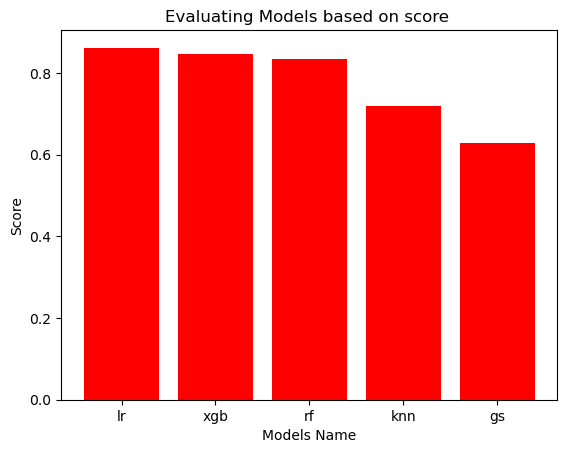

In [16]:
plt.bar('models','score',color='red',data=md_scores)
plt.title('Evaluating Models based on score ')
plt.xlabel('Models Name')
plt.ylabel('Score')
plt.show()

**The best model is Losgistic Regression**

# Randomized Search

In [12]:
lr = LogisticRegression(penalty='l2',solver='newton-cg',random_state=42)

In [15]:
params = {'C':[7,8,9,10,11,12,13,14],'max_iter':[100,300,500,700,800,1000]}
rm = RandomizedSearchCV(lr,params,verbose=3,cv=5)
rm.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................C=8, max_iter=800;, score=0.874 total time= 1.6min
[CV 2/5] END .................C=8, max_iter=800;, score=0.871 total time= 1.1min
[CV 3/5] END .................C=8, max_iter=800;, score=0.876 total time= 1.0min
[CV 4/5] END .................C=8, max_iter=800;, score=0.891 total time= 1.1min
[CV 5/5] END .................C=8, max_iter=800;, score=0.869 total time= 1.1min
[CV 1/5] END ................C=7, max_iter=1000;, score=0.873 total time= 1.0min
[CV 2/5] END ................C=7, max_iter=1000;, score=0.871 total time= 1.1min
[CV 3/5] END ................C=7, max_iter=1000;, score=0.873 total time= 1.1min
[CV 4/5] END ................C=7, max_iter=1000;, score=0.892 total time=  57.0s
[CV 5/5] END ................C=7, max_iter=1000;, score=0.869 total time= 1.1min
[CV 1/5] END ................C=14, max_iter=800;, score=0.874 total time= 1.1min
[CV 2/5] END ................C=14, max_iter=800;

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(random_state=42,
                                                solver='newton-cg'),
                   param_distributions={'C': [7, 8, 9, 10, 11, 12, 13, 14],
                                        'max_iter': [100, 300, 500, 700, 800,
                                                     1000]},
                   verbose=3)

In [17]:
rm.best_score_

0.876125

In [18]:
rm.best_estimator_

LogisticRegression(C=14, max_iter=800, random_state=42, solver='newton-cg')

In [34]:
lr = LogisticRegression(C=14,penalty='l2',solver='newton-cg',max_iter=800,random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(C=14, max_iter=800, random_state=42, solver='newton-cg')

In [35]:
y_pred = lr.predict(X_test)

In [36]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1016,  168],
       [ 122, 1094]], dtype=int64)

# Model Evaluation 

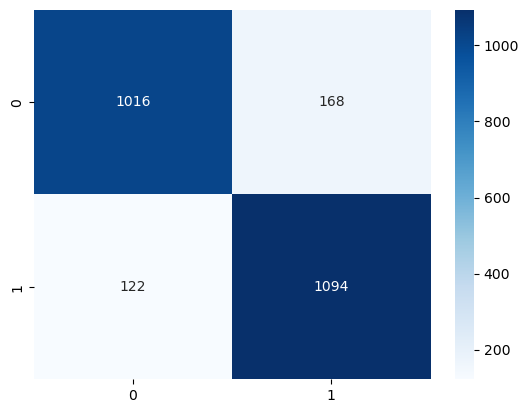

In [43]:
sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')
plt.show()

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1184
           1       0.87      0.90      0.88      1216

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



In [38]:
import pickle 

In [39]:
my_lr_model = 'movie_reviews_model.pkl'

with open(my_lr_model,'wb') as file:
    pickle.dump(lr,file)
    

In [40]:
my_vect_method = 'vetorize.pkl'

with open(my_vect_method,'wb') as file:
    pickle.dump(tf,file)